# 0. conceptos basicos

- un DataFrame es una matriz de datos tabulares que tienen un indice, unas columnas y unos valores

<img src="https://aprendeconalf.es/docencia/python/manual/img/pandas-dataframe.png" height="200" width="750">

- cada columna tiene datos que pueden ser: enteros, flotantes, fechas, object (strings), NULOS, etc
- podemos leer datos de diferentes formatos como: csv, json, pickle, sql, entre otros. Usando sus metodos respectivos
- para ver nuestro dataframe podemos usar diferentes metodos
    - si estamos en un jupyter notebook podemos simplemente imprimir la variable donde tenemos nuestro dataframe
    - `.head()` devuelve las primeras filas (la "cabeza" del DataFrame).
    - `.tail()` devuelve las ultimas filas (la "cola" de DataFrame).
    - `.info()` muestra información sobre cada una de las columnas, como el tipo de datos y el número de valores no nulos.
    - `.shape` devuelve el número de filas y columnas del DataFrame.
    - `.describe()` calcula algunas estadísticas de resumen para cada columna.
    - `.sample()` devuelve una muestra aleatoria del DataFrame.
- podemos leer columnas especificas, usando `df["columna"]` (como si fuera un diccionario de python)
- podemos leer multiples columnas especifias usando una lista, `df[["col1", "col2", "col3"]]`
- podemos hacer "slicing" del DataFrame, de la misma manera que los hacermos con listas en python, usando `.loc` y `.iloc`
    - `.loc[rango_filas, rango_columns]`
    - `.iloc[rango_indice_filas, rango_indice_columnas]`

# 1. importar librerias necesarias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. lectura de los datos

primero damos una primera mirada al archivo csv, nos daremos cuenta de que la primera linea es un titulo que nos estorba, por lo que debemos quitarlo al momento de leer los datos, tambien vemos valores `..` y `n.a` los cuales representan valores nulos, pero pandas no lo interpreta como tal

leemos los datos usando el metodo de pandas `read_csv()`, ya que estamos leyendo un archivo .csv, especificando que la cabecera de nuestros datos estan a partir de la segunda linea, esto lo aremos usando el parametro `header`, y especificaremos que los strings `..` y `n.a` sean leidos como valores nulos usando el parametro `na_values`

In [ ]:
datos = pd.read_csv("/content/Life expectancy at birth (years).csv")

UnicodeDecodeError: ignored

este dataset especifico tiene una codificacion especial, debemos especificarlo al metodo `.read_csv()`, usando el parametro `encoding`

In [4]:
datos = pd.read_csv("/content/Life expectancy at birth (years).csv", header=1, encoding="latin-1", na_values=["..", "n.a"])

miramos como se leyeron los datos

In [5]:
datos

,HDI Rank (2017),Country,Continent,1990,Unnamed: 3,1991,Unnamed: 5,1992,Unnamed: 7,1993,...,2013,Unnamed: 49,2014,Unnamed: 51,2015,Unnamed: 53,2016,Unnamed: 55,2017,Unnamed: 57
0,168,Afghanistan,Asia,49.9,NaN,50.6,NaN,51.3,NaN,52.0,...,62.5,NaN,62.9,NaN,63.3,NaN,63.7,NaN,64.0,NaN
1,68,Albania,Europe,71.8,NaN,71.8,NaN,71.8,NaN,71.9,...,77.7,NaN,78.0,NaN,78.2,NaN,78.3,NaN,78.5,NaN
2,85,Algeria,Africa,66.7,NaN,67.0,NaN,67.2,NaN,67.5,...,75.4,NaN,75.6,NaN,75.9,NaN,76.1,NaN,76.3,NaN
3,35,Andorra,Europe,76.5,NaN,76.7,NaN,76.9,NaN,77.0,...,81.2,NaN,81.3,NaN,81.4,a,81.5,a,81.7,a
4,147,Angola,Africa,41.7,NaN,41.9,NaN,42.1,NaN,42.3,...,60.4,NaN,60.9,NaN,61.2,NaN,61.5,NaN,61.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,NaN,Nauru,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,NaN,San Marino,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,a: Value from UNDESA (2011).,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### El dataset tiene multiples, problemas, vamos resolviendolos uno por uno

primero, hay muchas columnas sin nombre y ademas solo poseen valores que no nos sirven, vamos a quitarlas

In [6]:
col_bien =[]
for col in datos.columns:
    if not col.startswith("Unnamed"):
        col_bien.append(col)

datos = datos[col_bien]

datos

,HDI Rank (2017),Country,Continent,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,Asia,49.9,50.6,51.3,52.0,52.5,53.1,53.5,...,60.2,60.8,61.2,61.7,62.1,62.5,62.9,63.3,63.7,64.0
1,68,Albania,Europe,71.8,71.8,71.8,71.9,72.0,72.2,72.5,...,75.9,76.3,76.7,77.0,77.4,77.7,78.0,78.2,78.3,78.5
2,85,Algeria,Africa,66.7,67.0,67.2,67.5,67.8,68.1,68.5,...,74.0,74.4,74.7,74.9,75.2,75.4,75.6,75.9,76.1,76.3
3,35,Andorra,Europe,76.5,76.7,76.9,77.0,77.2,77.4,77.6,...,80.6,80.7,80.8,80.9,81.1,81.2,81.3,81.4,81.5,81.7
4,147,Angola,Africa,41.7,41.9,42.1,42.3,42.7,43.1,43.7,...,56.2,57.2,58.2,59.0,59.8,60.4,60.9,61.2,61.5,61.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,NaN,Nauru,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,NaN,San Marino,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,a: Value from UNDESA (2011).,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


el dataframe parece tener problemas en los ultimos registros, vamos a mirar los ultimos 15 registros

In [7]:
datos.tail(10)

,HDI Rank (2017),Country,Continent,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
188,116,Viet Nam,Asia,70.5,70.8,71.1,71.4,71.7,72.0,72.2,...,74.8,74.9,75.1,75.3,75.5,75.7,75.9,76.1,76.3,76.5
189,178,Yemen,Asia,57.9,58.2,58.5,58.8,59.0,59.3,59.5,...,62.9,63.2,63.5,63.8,64.0,64.3,64.5,64.7,65.0,65.2
190,144,Zambia,Africa,45.0,44.4,43.9,43.6,43.3,43.2,43.2,...,53.7,55.2,56.6,57.9,59.0,60.0,60.8,61.4,61.9,62.3
191,156,Zimbabwe,Africa,57.9,56.7,55.3,53.9,52.3,50.8,49.3,...,49.3,51.1,53.0,54.8,56.5,58.1,59.4,60.4,61.2,61.7
192,NaN,Monaco,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,Nauru,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,NaN,San Marino,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,a: Value from UNDESA (2011).,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,"Last updated: January 29, 2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


los ultimos registros no contienen informacion, vamos a eliminarlos usando la funcion `.drop()`, debemos especificarle los indices de los valores que vamos a borrar

In [8]:
datos = datos.drop(index=[192, 193, 194, 195, 196, 197])



In [9]:
datos.tail(10)

,HDI Rank (2017),Country,Continent,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
182,14,United Kingdom,Europe,75.7,75.9,76.1,76.3,76.5,76.7,76.9,...,79.8,80.1,80.4,80.6,80.8,81.0,81.2,81.4,81.6,81.7
183,13,United States,North America,75.3,75.4,75.6,75.7,75.9,76.1,76.2,...,78.2,78.4,78.5,78.7,78.8,79.0,79.1,79.2,79.4,79.5
184,55,Uruguay,South America,72.6,72.8,73.0,73.2,73.4,73.6,73.9,...,76.3,76.4,76.6,76.7,76.9,77.0,77.2,77.3,77.5,77.6
185,105,Uzbekistan,Asia,66.5,66.4,66.4,66.3,66.3,66.4,66.5,...,69.3,69.7,70.0,70.3,70.6,70.8,71.0,71.2,71.3,71.4
186,138,Vanuatu,Oceania,63.1,63.5,64.0,64.4,64.9,65.3,65.8,...,70.2,70.4,70.7,71.0,71.2,71.5,71.7,71.9,72.1,72.3
187,78,Venezuela (Bolivarian Republic of),South America,69.8,70.0,70.2,70.4,70.6,70.9,71.2,...,73.4,73.5,73.6,73.7,73.9,74.0,74.2,74.4,74.5,74.7
188,116,Viet Nam,Asia,70.5,70.8,71.1,71.4,71.7,72.0,72.2,...,74.8,74.9,75.1,75.3,75.5,75.7,75.9,76.1,76.3,76.5
189,178,Yemen,Asia,57.9,58.2,58.5,58.8,59.0,59.3,59.5,...,62.9,63.2,63.5,63.8,64.0,64.3,64.5,64.7,65.0,65.2
190,144,Zambia,Africa,45.0,44.4,43.9,43.6,43.3,43.2,43.2,...,53.7,55.2,56.6,57.9,59.0,60.0,60.8,61.4,61.9,62.3
191,156,Zimbabwe,Africa,57.9,56.7,55.3,53.9,52.3,50.8,49.3,...,49.3,51.1,53.0,54.8,56.5,58.1,59.4,60.4,61.2,61.7


miremos la informacion general del dataframe, para verificar los tipos de datos y valores nulos, usando la funcion `.info()`

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HDI Rank (2017)  189 non-null    object 
 1   Country          192 non-null    object 
 2   Continent        192 non-null    object 
 3   1990             191 non-null    float64
 4   1991             191 non-null    float64
 5   1992             191 non-null    float64
 6   1993             191 non-null    float64
 7   1994             191 non-null    float64
 8   1995             191 non-null    float64
 9   1996             191 non-null    float64
 10  1997             191 non-null    float64
 11  1998             191 non-null    float64
 12  1999             191 non-null    float64
 13  2000             191 non-null    float64
 14  2001             191 non-null    float64
 15  2002             191 non-null    float64
 16  2003             191 non-null    float64
 17  2004            

vemos que tenemos columnas con valores nulos, y la primera columna deberia ser de tipo entera pero aparece como tipo object

eliminamos las filas con valores nulos usando la funcion `.dropna()`, y cambiemos el tipo de datos de la primera columna usando `pd.to_numeric()`

In [11]:
datos = datos.dropna()

datos["HDI Rank (2017)"] = pd.to_numeric(datos["HDI Rank (2017)"])

miramos si nuestro dataset ya esta listo para ser explorado

In [12]:
datos

,HDI Rank (2017),Country,Continent,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,Asia,49.9,50.6,51.3,52.0,52.5,53.1,53.5,...,60.2,60.8,61.2,61.7,62.1,62.5,62.9,63.3,63.7,64.0
1,68,Albania,Europe,71.8,71.8,71.8,71.9,72.0,72.2,72.5,...,75.9,76.3,76.7,77.0,77.4,77.7,78.0,78.2,78.3,78.5
2,85,Algeria,Africa,66.7,67.0,67.2,67.5,67.8,68.1,68.5,...,74.0,74.4,74.7,74.9,75.2,75.4,75.6,75.9,76.1,76.3
3,35,Andorra,Europe,76.5,76.7,76.9,77.0,77.2,77.4,77.6,...,80.6,80.7,80.8,80.9,81.1,81.2,81.3,81.4,81.5,81.7
4,147,Angola,Africa,41.7,41.9,42.1,42.3,42.7,43.1,43.7,...,56.2,57.2,58.2,59.0,59.8,60.4,60.9,61.2,61.5,61.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,78,Venezuela (Bolivarian Republic of),South America,69.8,70.0,70.2,70.4,70.6,70.9,71.2,...,73.4,73.5,73.6,73.7,73.9,74.0,74.2,74.4,74.5,74.7
188,116,Viet Nam,Asia,70.5,70.8,71.1,71.4,71.7,72.0,72.2,...,74.8,74.9,75.1,75.3,75.5,75.7,75.9,76.1,76.3,76.5
189,178,Yemen,Asia,57.9,58.2,58.5,58.8,59.0,59.3,59.5,...,62.9,63.2,63.5,63.8,64.0,64.3,64.5,64.7,65.0,65.2
190,144,Zambia,Africa,45.0,44.4,43.9,43.6,43.3,43.2,43.2,...,53.7,55.2,56.6,57.9,59.0,60.0,60.8,61.4,61.9,62.3


todo correcto 🥳

# 3. analisis exploratorio

podemos ver los estadisticos principales usando la funcion `.describe()`

In [13]:
datos.describe()

,HDI Rank (2017),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,...,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,94.781915,64.711702,64.877128,65.043085,65.208511,65.389894,65.578191,65.780319,65.992021,66.213298,...,69.405319,69.781915,70.143085,70.486170,70.812234,71.121277,71.404255,71.665957,71.917021,72.151064
std,54.855477,9.888500,9.954762,10.018214,10.048834,10.052475,10.034273,10.023826,10.025054,10.031372,...,9.015707,8.796030,8.592143,8.406613,8.235602,8.088889,7.955665,7.838109,7.741846,7.656380
min,1.000000,34.200000,30.400000,28.100000,27.600000,29.000000,32.000000,35.900000,36.400000,37.100000,...,46.200000,46.900000,47.600000,48.300000,49.000000,49.800000,50.600000,51.400000,51.800000,52.200000
25%,47.750000,57.900000,58.350000,58.725000,58.775000,58.325000,58.650000,59.225000,59.150000,59.250000,...,63.275000,63.800000,64.350000,64.800000,65.125000,65.675000,66.075000,66.300000,66.600000,66.775000
50%,94.500000,67.750000,67.650000,67.900000,68.050000,68.250000,68.300000,68.600000,68.950000,69.250000,...,72.100000,72.350000,72.500000,72.650000,72.800000,73.000000,73.150000,73.300000,73.500000,73.750000
75%,142.250000,71.625000,71.800000,72.000000,72.150000,72.425000,72.700000,72.825000,73.050000,73.425000,...,75.800000,75.900000,76.100000,76.300000,76.400000,76.650000,76.825000,77.000000,77.225000,77.400000
max,189.000000,79.000000,79.200000,79.400000,79.500000,79.700000,79.900000,80.200000,80.400000,80.700000,...,82.700000,82.800000,83.000000,83.100000,83.300000,83.500000,83.600000,83.800000,84.000000,84.100000


podemos graficar la media por año, en un grafico

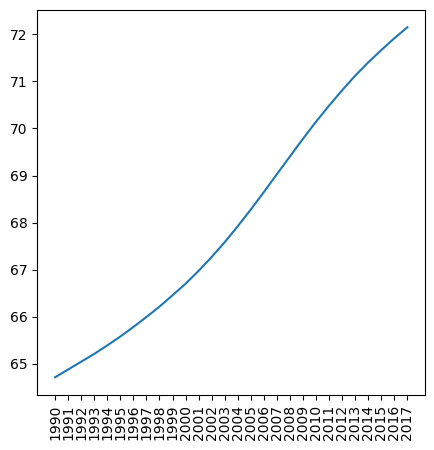

In [14]:
# lista con las columnas de interes
cols = [str(i) for i in range(1990, 2017 + 1)]

medias_esperanza = datos[cols].mean()

plt.figure(figsize=(5,5))

plt.plot(cols, medias_esperanza)

plt.xticks(rotation=90)
plt.show()

podemos ver el numero de paises agrupados por continentes (agrupandolos como en SQL), y graficarlo en un diagrama de barras (esta vez usando los metodos de graficacion de pandas)

<Axes: xlabel='Continent'>

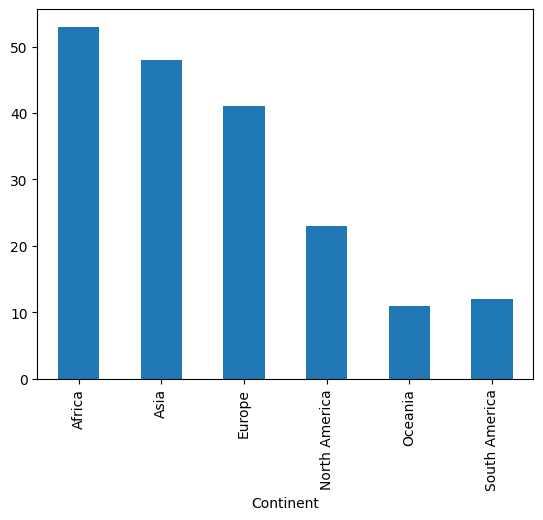

In [15]:
paises_continente = datos.groupby("Continent")["Country"].count()

paises_continente.plot.bar()

podemos ver como se distribuye la esperanza de vida por cada contiente, usando varios diagramas (caja, histograma, violin)

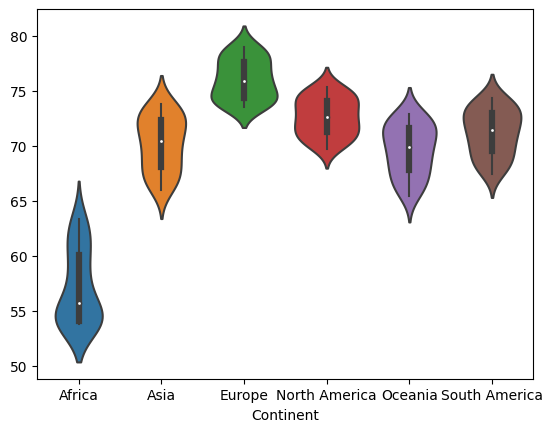

In [24]:
# lista con las columnas de interes
cols = [str(i) for i in range(1990, 2017 + 1)]

# caja

# paises_continente = datos.groupby("Continent")

# paises_continente = paises_continente[cols].mean().T

# paises_continente.plot.box()

# # histograma

# paises_continente.plot.hist(subplots=True)

# violin

import seaborn as sns

sns.violinplot(data=paises_continente)

plt.show()

podemos ver las correlaciones entre las variables

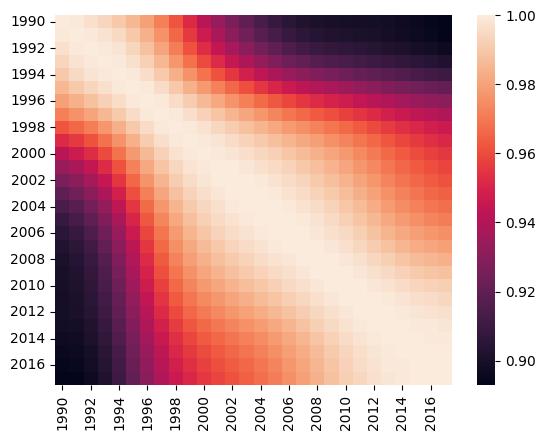

In [17]:
# lista con las columnas de interes
cols = [str(i) for i in range(1990, 2017 + 1)]

sns.heatmap(datos[cols].corr())

plt.show()

## y muchisimas otras cosas que se podrian hacer, por lo que la documentacion, StackOverflow y ahora chatGPT les seran de gran ayuda